# Workshop PR01: Setting up your workspace + Intro to data analysis

## Learning objectives
* Set up a Python3 working environment (Anaconda3)
* Cursory understanding of data analysis/manipulation with `pandas`

## Setting up your workspace

We want some kind of environment that we can write Python code into - we recommend installing Anaconda3 (Python 3.7). This is a Python (and R) distribution that comes with a bunch of useful Python modules pre-installed (e.g. `numpy`, `sklearn`, `matplotlib`).
1. **Download Anaconda3**. Download Anaconda3 (Python 3.7) from https://www.anaconda.com/distribution/ (make sure you select download it for the right operating system). Note: at some point it might prompt you to create an account with/sign into Anaconda cloud - you can just close and ignore that.
2. **Install `pandas`**. Run `pip install pandas` from the command line.

That's pretty much it. Try spinning up JupyterLab or a JupyterNotebook from the Anaconda3 Navigator.

## Intro to data analysis

Download [titanic.csv](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv) ([this is the website](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html) we've taken it from). We'll be using throughout this dataset throughout the preliminary workshops.

If we want to use Python to take a look at our Titanic data, then we need to get the data into some kind of in-memory Python object. We're going to use the `Dataframe` provided by the `pandas` module. Think of a `Dataframe` as pretty much the same thing as a table (like in Excel). Columns pertain to features (e.g. age, weight) and rows to instances (e.g. a person).

There are a handful of basic operations that you'll use pretty frequently, and which we'll run through now:
* Reading in data (`pd.read_csv(<path_to_csv>)`)
* Summarising the data (`df.info()` and `df.describe()`)
* Selecting columns (`df[<col_name>]` and `df[[<col1_name>, <col2_name>]]`)
* Selecting rows using boolean masks (`df[<mask>]`, this probably won't make sense until you see an example)
* Creating new columns (`df[<col1_name>] + df[<col2_name>]` and `df[<col_name>].apply(<function>)`)

Let's run through an example here.

### Reading and summarising the data

In [1]:
# import pandas, by convention aliased as pd
import pandas as pd

In [2]:
# read titanic.csv into a dataframe
path_to_data_file = "./titanic.csv"
df = pd.read_csv(path_to_data_file)

In [3]:
# check this worked properly by printing out the first few rows
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
# next thing we'll do is take a look at the metadata
# - how many instances there are?
# - what the column data type are?
# - are we missing any data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


## Selecting rows and colums

### Selecting rows with boolean slicing

In [5]:
# let's say that we only want to look at the data for people who died on the Titanic ("Survived" = 0)

In [6]:
# first step: create a boolean mask (essentially a list of True/False values which indicate which rows should be selected)
rows_we_want = df["Survived"] == 0
rows_we_want.head()

0     True
1    False
2    False
3    False
4     True
Name: Survived, dtype: bool

In [7]:
# second step: use the mask to slice out the rows that we want from the dataframe
died = df[rows_we_want]
died.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [8]:
# note, typically, you'll just do both steps in a single line
died_v2 = df[ df["Survived"] == 0 ]
died_v2.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


### Selecting one or more columns

In [9]:
# let's say that we wanted to take a look at "Fare" by itself, to select out the "Fare" column:
fare = df["Fare"]
fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

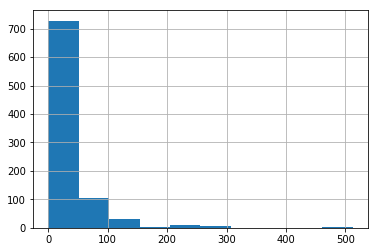

In [10]:
# now just for curiosity's sake, let's plot the fare distribution
%matplotlib inline
fare.hist()

In [11]:
# if - instead - we had wanted to pull out "Age" and "Sex" (i.e. two columns, not just one)
age_sex = df[ ["Age", "Sex"] ]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


## Creating new columns

In [12]:
# if we wanted to generate a new feature, "FamilySize" as the sum of "Siblings/Spouses" and "Parents/Children":
df["FamilySize"] = df["Siblings/Spouses Aboard"] + df["Parents/Children Aboard"]
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,FamilySize
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


In [13]:
# sometimes we'll also want to create new features by applying custom written functions to columns
# as an example, say we want to generate the feature "FareIsExpensive", a boolean feature which is True
#   if a passenger's fare was >= 50

In [14]:
# first step, define a function "fare_is_expensive(fare)", which operates over **a single fare, not a list of fares**
def fare_is_expensive(fare):
    return fare >= 50

In [15]:
# second step, "apply" the function to the feature (in this case, "Fare") that you want to generate the new feature using
df["FareIsExpensive"] = df["Fare"].apply(fare_is_expensive)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,FamilySize,FareIsExpensive
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,True
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,True
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,False


In [16]:
# df[<col_name>].apply(<function>) generates a new column by applying <function> to each row in df[<col_name>]